In [1]:
import numpy as np
from random import choices, randrange
import random
import matplotlib.pyplot as plt
from numba import njit
from sklearn.datasets import make_blobs
from utility import *
from tqdm import tqdm
from sklearn.cluster import k_means

In [3]:
def change_sol(sol, k):
    new_sol = sol.copy()
    n = randrange(len(new_sol))
    old_value = new_sol[n]

    while old_value == new_sol[n]:
        new_sol[n] = randrange(K)

    return new_sol

def simulated_annealing(base_sol, points, K, iters, alpha, verbose = True):
    best_sol = base_sol
    base_val = squared_inner_distance(best_sol, points, K)
    best_value = base_val
    T = base_val*1/100
    Tf = 10**-5
    curr_sol = base_sol
    curr_val = best_value
    iter = 1

    old_sol = base_sol
    finito = False
    no_update = 0

    while(finito == False):
        if(verbose):
            print("Iteration number:", iter, "Best value percentuale: ", curr_val/base_val*100, "% T:", T)
        iter = 1 + iter
        old_sol = curr_sol
        
        for i in range(iters):
            candidate = change_sol(curr_sol, K)
            val_candidate = squared_inner_distance(candidate, points, K)

            if(val_candidate < best_value):
                best_value = val_candidate
                best_sol = candidate
            
            if(val_candidate < curr_val):
                curr_val = val_candidate
                curr_sol = candidate
                no_update = 0
            else:
                r = random.uniform(0, 1)
                delta = abs(curr_val - val_candidate)
                tresh = np.exp(-delta/T)
                no_update = 0
                if(r < tresh):
                    curr_val = val_candidate
                    curr_sol = candidate
                else:
                    no_update = no_update + 1

        T = alpha*T
    
        if(no_update == 500 or T <= Tf):
            finito = True
    return best_sol

Iteration number: 1 Best value percentuale:  100.0 % T: 65.34073265289459
Iteration number: 2 Best value percentuale:  102.31231701244626 % T: 64.68732532636564
Iteration number: 3 Best value percentuale:  103.91048258725233 % T: 64.04045207310197
Iteration number: 4 Best value percentuale:  106.25129915116985 % T: 63.40004755237096
Iteration number: 5 Best value percentuale:  109.84061602546984 % T: 62.766047076847244
Iteration number: 6 Best value percentuale:  112.42752849452336 % T: 62.13838660607877
Iteration number: 7 Best value percentuale:  113.78030976493973 % T: 61.51700274001798
Iteration number: 8 Best value percentuale:  114.58556807809939 % T: 60.9018327126178
Iteration number: 9 Best value percentuale:  117.30272292854507 % T: 60.29281438549162
Iteration number: 10 Best value percentuale:  119.26645041899523 % T: 59.6898862416367
Iteration number: 11 Best value percentuale:  119.86504503385571 % T: 59.09298737922033
Iteration number: 12 Best value percentuale:  121.89922

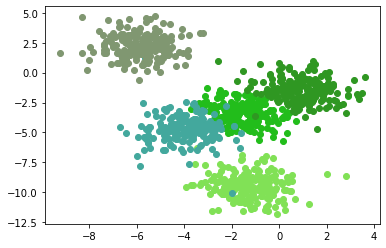

In [4]:
points, centroids = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=2)
N = len(points)
K = 5

sol = create_initial_sol(points, K)
sol = simulated_annealing(sol, points, K, 10, 0.99)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))

printR2sol(points, sol, K)

In [4]:
n_points = [500,1000,1000,1000,1000,1000,1500,1500,2000,3000,5000,10000]
n_clusters = [5,2,4,5,6,7,5,10,5,5,5,10]
dim_points = [32,32,32,32,20,20,18,18,18,16,16,16]
vals = []

for test in tqdm(range(1,13)):
    points = load_points(f'C:/Users/franc/Documents/GitHub/Ricerca_Operativa_2022/Ricerca_Operativa_2022/benchmark/benchmark{test}.txt')
    N = len(points)
    K = n_clusters[test-1]

    sol = create_initial_sol(points, K)
    sol = simulated_annealing(sol, points, K, 10, 0.99, False)
    val = squared_inner_distance(sol, points, K)
    vals.append(val)


with open("risultatiSA.txt", 'w') as file:
    file.write("K-means:\n")
    file.write(str(vals))

100%|██████████| 12/12 [03:22<00:00, 16.85s/it]


In [5]:
print(vals)

[130127.76143710129, 23914.54118390938, 4462.726213868591, 4297.484264158122, 33686.84931195001, 14545.941364182216, 4483.330624579144, 13116.362976661609, 18331.4118468564, 135031.45152822518, 13920.13622038912, 85868.26766758639]
